### Imports

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Leer archivo

In [48]:
# Creamos una lista vacía donde almacenaremos las matrices NumPy
ECAP_cols = []
# Leemos el archivo .xlsx utilizando pandas
df = pd.read_excel('ECAP.xlsx')

# Recorremos cada columna del dataframe
for col in df.columns:
  # Convertimos la columna en una matriz NumPy
  ECAP_array = df[col] .to_numpy()
  # Añadimos la matriz a la lista
  ECAP_cols.append(ECAP_array)
#print(ECAP_cols[5][0])

# Obtención del ECAP de las diferentes series de estimulación

In [49]:
ECAP_array = [] #cada indice correpsonde a un canal del 0 al 11
for NTR_Nr in range(12):
    ECAP = {} # cada canal contiene un dic 
    for type in range(4): # son 4 tipos 
        array = [] # cada item del dic es una lista de tuplas de (tiempo, voltaje)
        for n in range(32): # son 32 samples por tipo
            array.append(( ECAP_cols[5][(n+32*(type) + 128*(NTR_Nr))], ECAP_cols[6][(n+32*(type)+ 128*(NTR_Nr))] ))
        ECAP[type] = array
    ECAP_array.append(ECAP)
#print(ECAP_array[11][3])

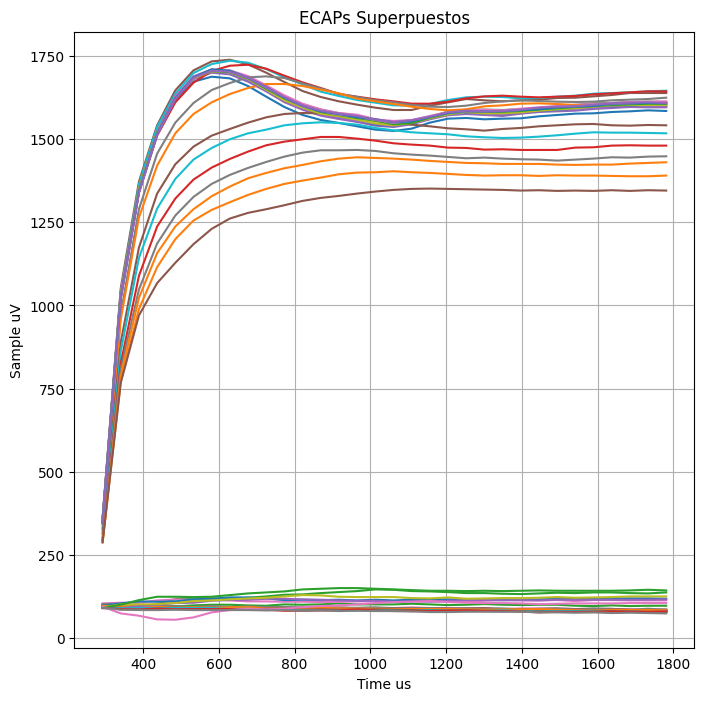

In [50]:
fig = plt.figure(figsize=(8,8))
axs = fig.subplots(1, 1)

for canal in range(12):
    for key in range(4):
        time, amp = zip(*ECAP_array[canal][key])
        axs.plot(time, amp , label='NRT Nr {}'.format(canal+1) )
        axs.set_title('ECAPs Superpuestos')
        axs.set_xlabel('Time us')
        axs.set_ylabel('Sample uV')
#plt.legend()
plt.grid()
plt.show()

In [51]:
def label_key(key):
    match key:
        case 0:
            return "A: Raw Probe Alone"
        case 1:
            return "B: Raw Masker And Probe"
        case 2:
            return "C: Raw Masker Alone"
        case 3: 
            return "D : Switch On Artefact"

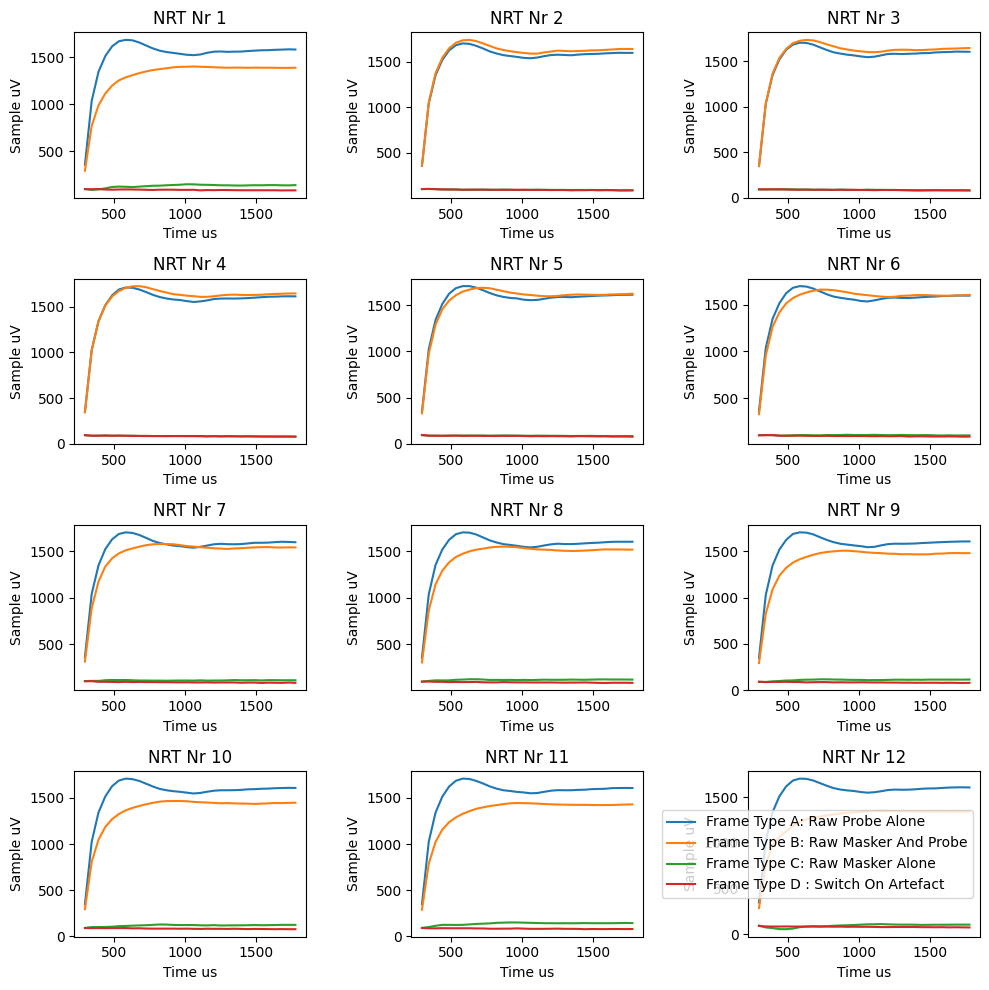

In [52]:
# Create a figure with a subplot for each array
fig = plt.figure(figsize=(10,10))
axs = fig.subplots(4, 3)


# Iterate through the arrays and plot them in the corresponding subplot
for canal in range(12):
    for key in range(4):
        time, amp = zip(*ECAP_array[canal][key])
        row = canal // 3
        col = canal % 3
        axs[row, col].plot(time, amp, label= 'Frame Type {}'.format(label_key(key)))
        axs[row, col].set_title('NRT Nr {}'.format(canal+1))
        axs[row, col].set_xlabel('Time us')
        axs[row, col].set_ylabel('Sample uV')
axs[3,2].legend()

# Show the figure
plt.tight_layout()
plt.show()

# Ecap Final: A-(B-C)

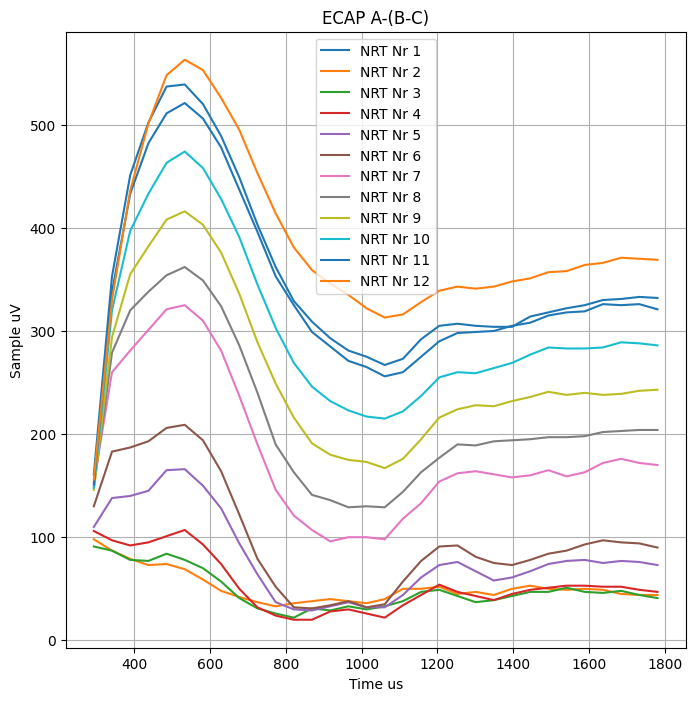

In [53]:
fig = plt.figure(figsize=(8,8))
axs = fig.subplots(1, 1)
for canal in range(12):
    time, A = zip(*ECAP_array[canal][0])
    _, B = zip(*ECAP_array[canal][1])
    _, C = zip(*ECAP_array[canal][2])
    _, D = zip(*ECAP_array[canal][3])

    ECAP_Final = np.array(A)-( np.array(B)- np.array(C)) 
    
    axs.plot(time, ECAP_Final, label='NRT Nr {}'.format(canal+1))
    axs.set_title('ECAP A-(B-C)')
    axs.set_xlabel('Time us')
    axs.set_ylabel('Sample uV')
plt.legend()
plt.grid()
plt.show()

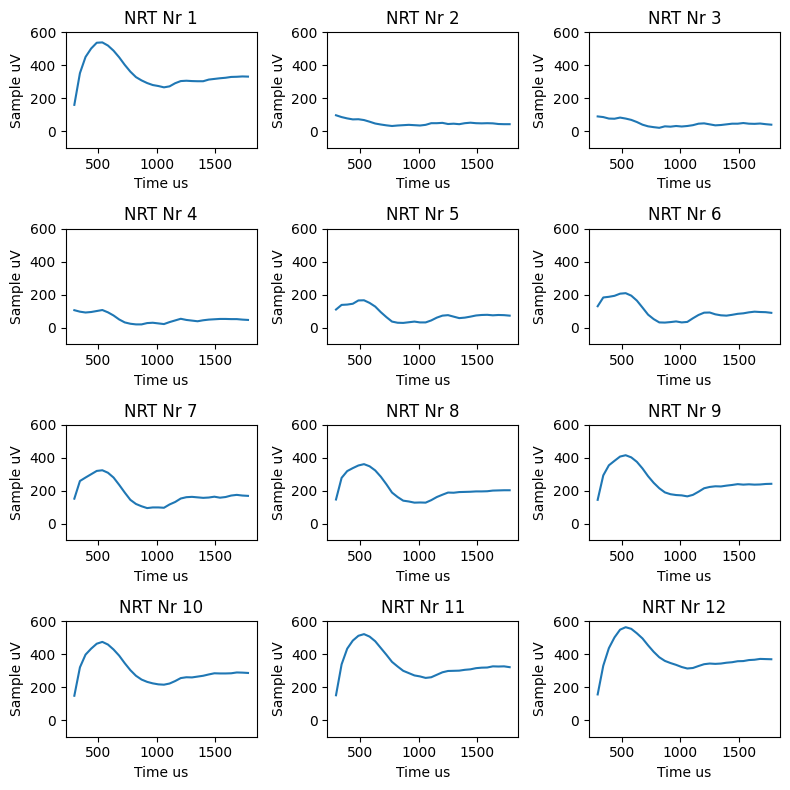

In [54]:
fig = plt.figure(figsize=(8,8))
axs = fig.subplots(4, 3)
for canal in range(12):
    time, A = zip(*ECAP_array[canal][0])
    _, B = zip(*ECAP_array[canal][1])
    _, C = zip(*ECAP_array[canal][2])
    _, D = zip(*ECAP_array[canal][3])

    ECAP_Final = np.array(A)-( np.array(B)- np.array(C))

    row = canal // 3
    col = canal % 3
    axs[row, col].plot(time, ECAP_Final)
    axs[row, col].set_title('NRT Nr {}'.format(canal+1))
    axs[row, col].set_xlabel('Time us')
    axs[row, col].set_ylabel('Sample uV')
    axs[row, col].set_ylim(-100, 600)
plt.tight_layout()
plt.show()

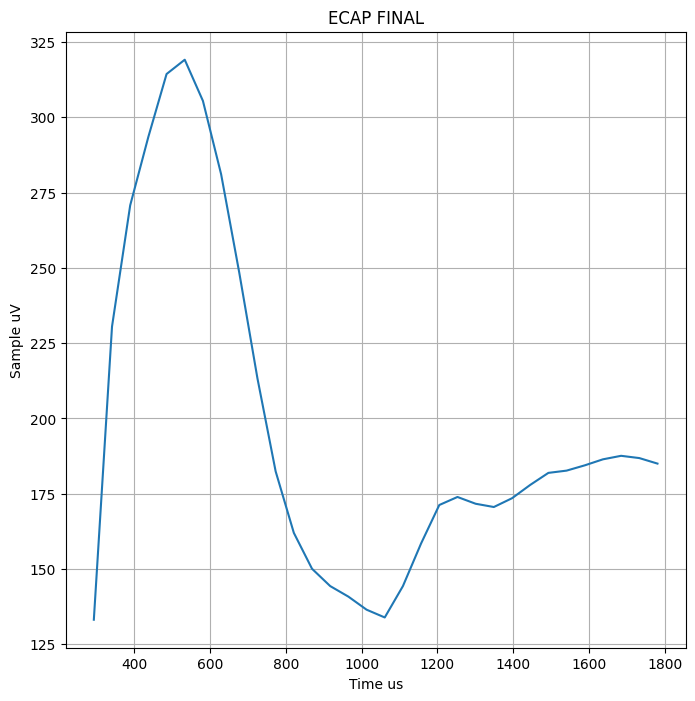

In [55]:
fig = plt.figure(figsize=(8,8))
axs = fig.subplots(1, 1)
avg_ECAP = 0
for canal in range(12):
    time, A = zip(*ECAP_array[canal][0])
    _, B = zip(*ECAP_array[canal][1])
    _, C = zip(*ECAP_array[canal][2])
    _, D = zip(*ECAP_array[canal][3])

    ECAP_Final = np.array(A)-( np.array(B)- np.array(C))
    avg_ECAP += ECAP_Final
avg_ECAP = avg_ECAP/12
axs.plot(time, avg_ECAP)
axs.set_title('ECAP FINAL')
axs.set_xlabel('Time us')
axs.set_ylabel('Sample uV')
plt.grid()
plt.show()